In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

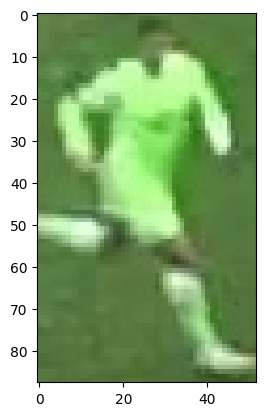

In [3]:
image_path="Output/cropped.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

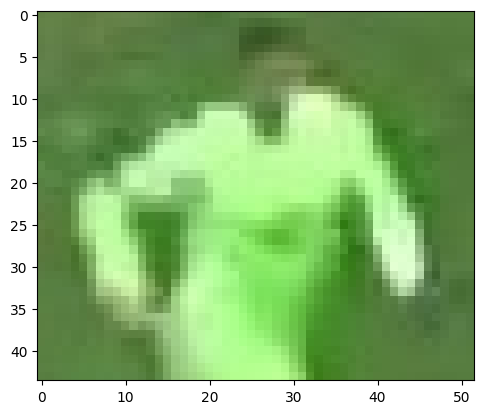

In [4]:
# Top Half of the image
top_half_image = image[0:int(image.shape[0]/2),:]

plt.imshow(top_half_image)
plt.show()

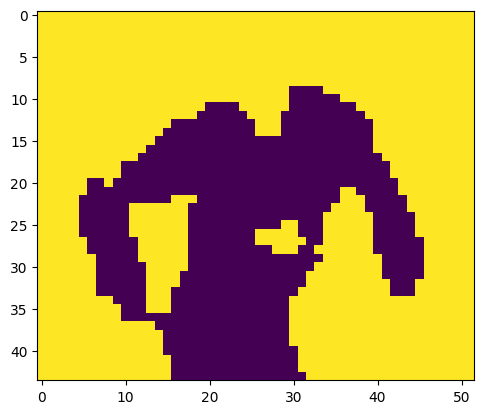

In [5]:
# Cluster image into 2
image_2d = top_half_image.reshape(-1,3)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Label the clusters
labels = kmeans.labels_

# Reshape labels to the original image dimensions
cluster_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(cluster_image)

In [6]:
corner_clusters = [cluster_image[0,0], cluster_image[0,-1], cluster_image[-1,0], cluster_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [7]:
player_cluster = 1-non_player_cluster


In [8]:
kmeans.cluster_centers_[player_cluster]

array([171.44010417, 235.95703125, 142.73046875])